## Logistic Regression

Logistic Regression merupakan salah satu algoritma klasifikasi dasar yang cukup popular. Secara sederhana, Logistic regression hampir serupa dengan linear regression tetapi linear regression digunakan untuk Label atau Target Variable yang berupa numerik atau continuous value, sedangkan Logistic regression digunakan untuk Label atau Target yang berupa __categorical/discrete value__.

Contoh continuous value adalah harga rumah, harga saham, suhu, dsb; dan contoh dari categorical value adalah prediksi SPAM or NOT SPAM (1 dan 0) atau prediksi customer SUBSCRIBE atau UNSUBSCRIBED (1 dan 0).

Logistic regression adalah salah satu linear classifier, oleh karena itu, Logistik regression juga menggunakan rumus atau fungsi yang sama seperti linear regression yaitu:

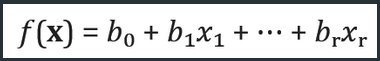

Output dari Logistic Regression adalah 1 atau 0; sehingga real value dari fungsi logit ini perlu ditransfer ke nilai di antara 1 dan 0 dengan menggunakan fungsi sigmoid.

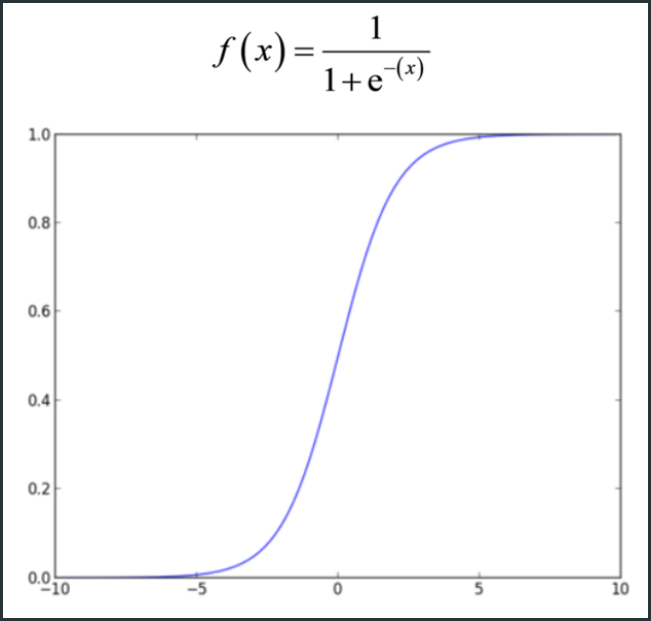

Jadi, jika output dari fungsi sigmoid bernilai lebih dari 0.5, maka data point diklasifikasi ke dalam label/class: 1 atau YES; dan kurang dari 0.5, akan diklasifikasikan ke dalam label/class: 0 atau NO.

Pemodelan Logistic Regresion dengan memanfaatkan Scikit-Learn sangatlah mudah. Cukup menggunakan modul __Liner Regression__ dari Scikit-learn, dan memanggil fungsi __LogisticRegression()__

In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

C:\Users\tkwt.bda\AppData\Local\Temp/ipykernel_14688/2265838139.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


Training Accuracy : 0.8839213300892133
Testing Accuracy : 0.8661800486618005

Confusion matrix
[[1990   54]
 [ 276  146]]

Classification report
              precision    recall  f1-score   support

       False       0.88      0.97      0.92      2044
        True       0.73      0.35      0.47       422

    accuracy                           0.87      2466
   macro avg       0.80      0.66      0.70      2466
weighted avg       0.85      0.87      0.85      2466



C:\Users\tkwt.bda\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

Decision Tree merupakan salah satu metode klasifikasi yang populer dan banyak diimplementasikan serta mudah diinterpretasi. Decision tree adalah model prediksi dengan struktur pohon atau struktur berhierarki. Decision Tree dapat digunakan untuk classification problem dan regression problem. Secara sederhana, struktur dari decision tree adalah sebagai berikut:

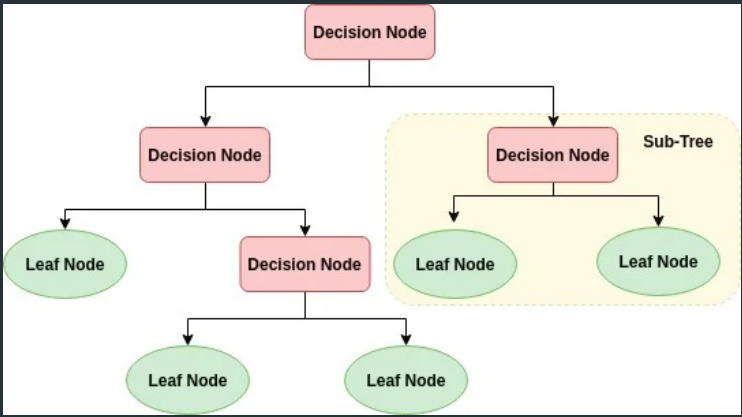

Decision tree terdiri dari :

    1. Decision Node yang merupakan feature/input variabel;
    2. Branch yang ditunjukkan oleh garis hitam berpanah, yang adalah rule/aturan keputusan, dan
    3. Leaf yang merupakan output/hasil.
    
Decision Node paling atas dalam decision tree dikenal sebagai akar keputusan, atau feature utama yang menjadi asal mula percabangan. Jadi, decision tree membagi data ke dalam kelompok atau kelas berdasarkan feature/variable input, yang dimulai dari node paling atas (akar), dan terus bercabang ke bawah sampai dicapai cabang akhir atau leaf.

Misalnya ingin memprediksi apakah seseorang yang mengajukan aplikasi kredit/pinjaman, layak untuk mendapat pinjaman tersebut atau tidak. Dengan menggunakan decision tree, dapat membreak-down kriteria-kriteria pengajuan pinjaman ke dalam hierarki seperti gambar berikut :

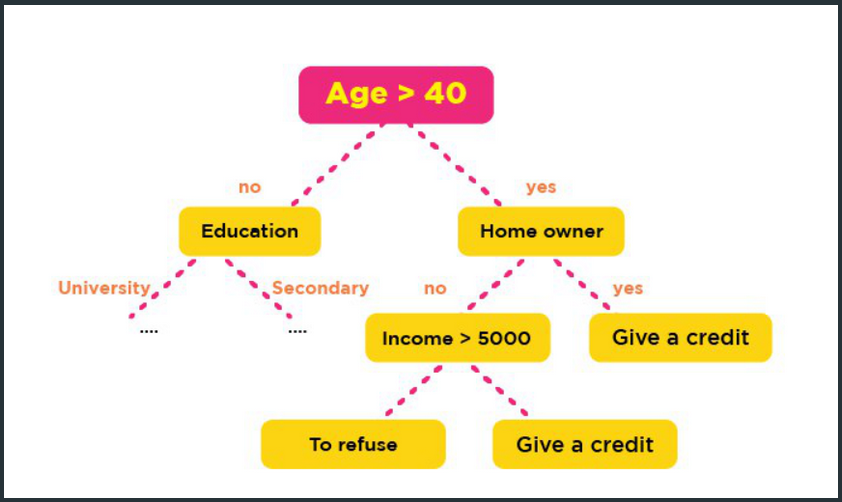

Seumpama, orang yang mengajukan berumur lebih dari 40 tahun, dan memiliki rumah, maka aplikasi kreditnya dapat diluluskan, sedangkan jika tidak, maka perlu dicek penghasilan orang tersebut. Jika kurang dari 5000, maka permohonan kreditnya akan ditolak. Dan jika usia kurang dari 40 tahun, maka selanjutnya dicek jenjang pendidikannya, apakah universitas atau secondary. Nah, percabangan ini masih bisa berlanjut hingga dicapai percabangan akhir/leaf node.

Seperti yang sudah dilakukan dalam prosedur pemodelan machine learning, selanjutnya dapat dengan mudah melakukan pemodelan decision tree dengan menggunakan scikit-learn module, yaitu DecisionTreeClassifier.

In [2]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/online_raw.csv')
dataset.fillna(dataset.mean(), inplace = True)

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
X = dataset.drop(['Revenue'], axis = 1)
y = dataset['Revenue']

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train, y_train))
print('Testing Accuracy :', decision_tree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8607731819410651


C:\Users\tkwt.bda\AppData\Local\Temp/ipykernel_14688/1992074844.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.fillna(dataset.mean(), inplace = True)


## Linear Regression

Regression merupakan metode statistik dan machine learning yang paling banyak digunakan. Seperti yang dijelaskan sebelumnya, regresi digunakan untuk memprediksi output label yang berbentuk numerik atau continuous value. Dalam proses training, model regresi akan menggunakan variabel input (independent variables atau features) dan variabel output (dependent variables atau label) untuk mempelajari bagaimana hubungan/pola dari variabel input dan output.

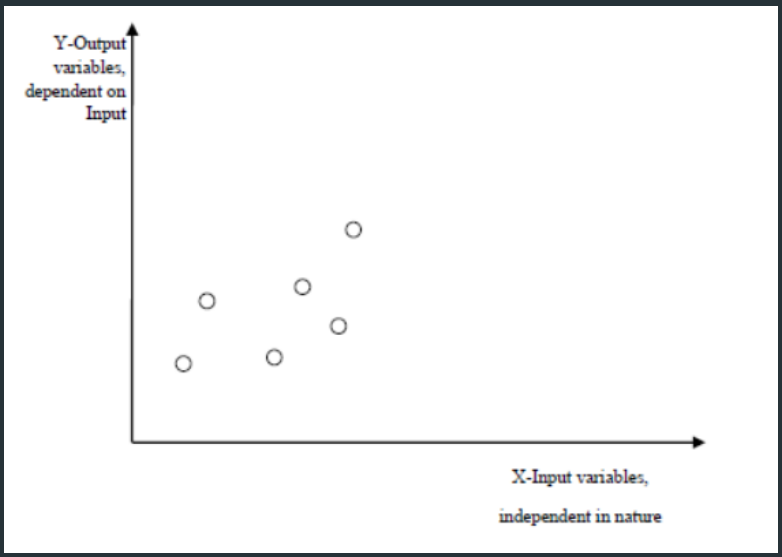

In [3]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train,y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


Mean squared error of testing set: 0.010913024655841007
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


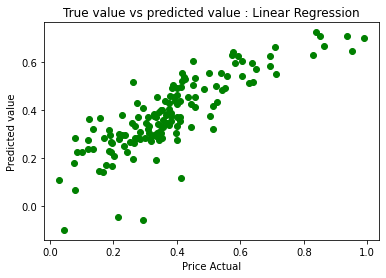

In [4]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

Semakin kecil nilai MSE, RMSE, dan MAE, semakin baik pula performansi model regresi.